# Import Libraries #

In [123]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Read in sheets of xlsx file #

In [124]:
df1 = pd.read_excel('data/Muesli Project raw data.xlsx', 0, header=1)
df2 = pd.read_excel('data/Muesli Project raw data.xlsx', 1, header=0)
df3 = pd.read_excel('data/Muesli Project raw data.xlsx', 2, header=0)
df4 = pd.read_excel('data/Muesli Project raw data.xlsx', 3, header=0)

# Column names restructuring #

In [125]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()
df4.columns = df4.columns.str.lower()

In [126]:
df1.columns = df1.columns.str.replace(' ', '_').str.replace('-', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace(' ', '_')
df4.columns = df4.columns.str.replace(' ', '_')

Understand your data

In [127]:
df1.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [7]:
print(df1.origin_channel.unique())
print(df1['country/region'].unique())
print(df1.quantity.max())

['Email' 'Sales' 'Facebook']
['United States']
14


In [8]:
df2.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


In [9]:
df3.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [10]:
df4.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   country/region  9994 non-null   object        
 8   city            9994 non-null   object        
 9   state           9994 non-null   object        
 10  postal_code     9983 non-null   float64       
 11  region          9994 non-null   object        
 12  category        9994 non-null   object        
 13  sub-category    9994 non-null   object        
 14  product_id      9994 non-null   object        
 15  sale

In [12]:
print(df1.order_date.min())
print(df1.order_date.max())

2017-01-03 00:00:00
2020-12-30 00:00:00


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


# Data Cleaning #

## Remove Duplicates ##

In [16]:
#df1['order_id'].duplicated().value_counts()

# one order can contain several products

False    5009
True     4985
Name: order_id, dtype: int64

In [17]:
df1.drop(columns=['index', 'customer_id', 'customer_name', 'country/region', 'postal_code',
 'region', 'category', 'sub-category', 'product_id', 'sales', 'discount', 'profit'], inplace=True)

df1.head()

,order_id,order_date,ship_mode,origin_channel,city,state,quantity
0,CA-2019-121755,2019-01-16,Second Class,Email,Los Angeles,California,3
1,CA-2019-118255,2019-03-11,First Class,Sales,Eagan,Minnesota,2
2,CA-2019-169194,2019-06-20,Standard Class,Email,Dover,Delaware,3
3,CA-2019-111682,2019-06-17,First Class,Email,Troy,New York,2
4,CA-2018-135545,2018-11-24,Standard Class,Email,Los Angeles,California,2


In [18]:
df1.order_id.count()

9994

In [19]:
df2.drop(columns='customer_name', inplace=True)

df2.head()

,order_id,arrival_scan_date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06


In [20]:
df2['order_id'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: order_id, Length: 333, dtype: bool

In [21]:
df2.order_id.count()

333

In [22]:
df3.drop(columns='row_id', inplace=True)

df3.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


In [23]:
df3.drop_duplicates(keep='first', inplace=True)

In [24]:
df3.shape
#df3.order_id.count()

(3003, 4)

In [25]:
df4.drop(columns='pickup_date', inplace=True)

df4.head()

,order_id,ready_to_ship_date
0,CA-2019-116540,2019-09-02
1,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05


In [26]:
df4.drop_duplicates(keep='first', inplace=True)

In [27]:
df4.order_id.count()

204

Combine dataframes

df1: Orders including date and types and contents of order <br>
df3: time from order date to on truck scan <br>
df4: time from ready to ship to pickup (express vs regular) <br>
df2: QR scan date, arrival date at the customer <br>

In [28]:
order_ready_truck = pd.merge(df3, df4, how='left', on='order_id', sort=False)
order_ready_truck.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT


In [29]:
order_ready_truck.order_id.count()

3003

In [30]:
order_arrival = pd.merge(order_ready_truck, df2, how='left', on='order_id', sort=False)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT


In [31]:
order_arrival.count()

order_id              3003
order_date            3003
on_truck_scan_date    3003
ship_mode             3003
ready_to_ship_date     204
arrival_scan_date      333
dtype: int64

In [32]:
order_arrival['order_weekday'] = order_arrival['order_date'].dt.dayofweek # dayofweek means weekdays, 0=Monday, 6=Sunday
order_arrival.head(15)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4
5,CA-2019-134474,2019-01-05,2019-01-11,Standard Processing,NaT,NaT,5
6,US-2019-164630,2019-01-04,2019-01-11,Standard Processing,NaT,NaT,4
7,CA-2019-158806,2019-01-07,2019-01-14,Standard Processing,NaT,NaT,0
8,CA-2019-140746,2019-01-15,2019-01-16,Express,NaT,NaT,1
9,CA-2019-126543,2019-01-09,2019-01-16,Standard Processing,NaT,NaT,2


Data augmentation + KPIs

In [36]:
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4


In [116]:
order_arrival['ordertoready'] = order_arrival['ready_to_ship_date'] - order_arrival['order_date']
order_arrival['order_to_ready'] = order_arrival['ordertoready'].apply(lambda x: x.days)
order_arrival.drop(columns='ordertoready', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,timetoship,transittime,order_to_ready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,4,NaN,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,7,NaN,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6,NaN,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6,NaN,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,5,NaN,NaN


In [39]:
order_arrival['time_to_ship'] = order_arrival['on_truck_scan_date'] - order_arrival['order_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,order_to_ready,time_to_ship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaT,4 days
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaT,7 days
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT,6 days
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaT,6 days
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaT,5 days


In [40]:
order_arrival['time_to_ship'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3003 entries, 0 to 3002
Series name: time_to_ship
Non-Null Count  Dtype          
--------------  -----          
3003 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 46.9 KB


In [41]:
df_merged = order_arrival.copy()
df_merged.shape

(3003, 9)

In [42]:
order_arrival['ordertoready'] = order_arrival['order_to_ready'].apply(lambda x: x.days)
order_arrival.drop(columns='order_to_ready', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,time_to_ship,ordertoready
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,4 days,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,7 days,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6 days,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,6 days,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,5 days,NaN


In [43]:
#orderarrival_sub1 = order_arrival.sort_values('ordertoready')[order_arrival['ordertoready'] >= 1]
#orderarrival_sub1.head()

In [44]:
#print(order_arrival.time_to_ship.describe())
#print(order_arrival.time_to_ship.info())

In [45]:
order_arrival['timetoship'] = order_arrival['time_to_ship'].apply(lambda x: x.days)
order_arrival.drop(columns='time_to_ship', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5


In [46]:
#orderarrival_sub2 = order_arrival.sort_values('timetoship')[order_arrival['timetoship'] >= 1]
#orderarrival_sub2.head()

In [47]:
order_arrival['transit_time'] = order_arrival['arrival_scan_date'] - order_arrival['on_truck_scan_date']
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transit_time
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaT


In [48]:
#print(order_arrival.transit_time.describe())
#print(order_arrival.transit_time.info())

In [49]:
order_arrival['transittime'] = order_arrival['transit_time'].apply(lambda x: x.days)
order_arrival.drop(columns='transit_time', inplace=True)
order_arrival.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN


In [50]:
#orderarrival_sub3 = order_arrival.sort_values('transittime')[order_arrival['transittime'] >= 1]
#orderarrival_sub3.head()

Ploting

In [51]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['ordertoready'])

In [52]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['timetoship'])

In [53]:
# plt.figure(figsize =(5, 5))
# plt.boxplot(x = order_arrival['transittime'])

In [54]:
# Standard_Realization_Time = {0: 4, 1: 3, 2: 5, 3: 6, 4: 5, 5: 4, 6: 3}
# Express_Realization_time = {0: 2, 1: 3, 2: 2, 3: 4, 4: 5, 5: 4, 6: 3}

In [55]:
df_merged = order_arrival.copy()

In [56]:
df_merged_standard = df_merged[df_merged["ship_mode"] == "Standard Processing"]
df_merged_standard.shape

(2340, 10)

In [57]:
df_merged_express = df_merged[df_merged["ship_mode"] == "Express"]
df_merged_express.shape

(663, 10)

# Processing Time Analysis #

Analysis of time taken by the warehouse from the order received till it is ready to ship.

In [58]:
Standard_processing_Time = {0: 2, 1: 2, 2: 2, 3: 4, 4: 4, 5: 4, 6: 2}
Express_processing_time = {0: 2, 1: 2, 2: 2, 3: 4, 4: 4, 5: 3, 6: 2}

In [59]:
df_merged_standard["expected_processing_time"] =  df_merged_standard['order_weekday'].map(Standard_processing_Time)
df_merged_express["expected_processing_time"] =  df_merged_express['order_weekday'].map(Express_processing_time)

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/236644081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard["expected_processing_time"] =  df_merged_standard['order_weekday'].map(Standard_processing_Time)
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/236644081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express["expected_processing_time"] =  df_merged_express['order_weekday'].map(Express_processing_time)


In [60]:
df_processing_standard = df_merged_standard[df_merged_standard['ordertoready'] >= 0]
df_processing_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 669 to 2800
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  151 non-null    object        
 1   order_date                151 non-null    datetime64[ns]
 2   on_truck_scan_date        151 non-null    datetime64[ns]
 3   ship_mode                 151 non-null    object        
 4   ready_to_ship_date        151 non-null    datetime64[ns]
 5   arrival_scan_date         18 non-null     datetime64[ns]
 6   order_weekday             151 non-null    int64         
 7   ordertoready              151 non-null    float64       
 8   timetoship                151 non-null    int64         
 9   transittime               18 non-null     float64       
 10  expected_processing_time  151 non-null    int64         
dtypes: datetime64[ns](4), float64(2), int64(3), object(2)
memory usage: 14.2+ KB


In [61]:
df_processing_express = df_merged_express[df_merged_express['ordertoready'] >= 0]
df_processing_express.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 641 to 2762
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  53 non-null     object        
 1   order_date                53 non-null     datetime64[ns]
 2   on_truck_scan_date        53 non-null     datetime64[ns]
 3   ship_mode                 53 non-null     object        
 4   ready_to_ship_date        53 non-null     datetime64[ns]
 5   arrival_scan_date         4 non-null      datetime64[ns]
 6   order_weekday             53 non-null     int64         
 7   ordertoready              53 non-null     float64       
 8   timetoship                53 non-null     int64         
 9   transittime               4 non-null      float64       
 10  expected_processing_time  53 non-null     int64         
dtypes: datetime64[ns](4), float64(2), int64(3), object(2)
memory usage: 5.0+ KB


In [62]:
df_processing_standard['processing_time'] = df_processing_standard['ordertoready'] - df_processing_standard['expected_processing_time']
df_processing_standard['processed_on_time_y/n'] = df_processing_standard['processing_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/4035748512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processing_standard['processing_time'] = df_processing_standard['ordertoready'] - df_processing_standard['expected_processing_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/4035748512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processing_standard['processed_on_time_y/n'] = df_processing_standard['processing_time'].apply(lambda x: 'yes' if x <= 

In [63]:
df_processing_express['processing_time'] = df_processing_express['ordertoready'] - df_processing_express['expected_processing_time']
df_processing_express['processed_on_time_y/n'] = df_processing_express['processing_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/225367680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processing_express['processing_time'] = df_processing_express['ordertoready'] - df_processing_express['expected_processing_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/225367680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processing_express['processed_on_time_y/n'] = df_processing_express['processing_time'].apply(lambda x: 'yes' if x <= 0 else 

In [64]:
df_processing_express['processed_on_time_y/n'].describe()

count      53
unique      2
top       yes
freq       41
Name: processed_on_time_y/n, dtype: object

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

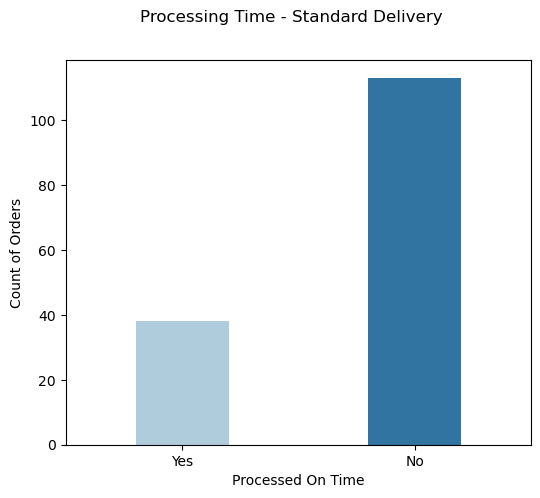

In [65]:
df_processing_standard
fig, ax = plt.subplots(1, figsize=(6,5))

#fig.light_palette('seagreen')
ax=sns.countplot(x=df_processing_standard['processed_on_time_y/n'], order=['yes', 'no'], palette='Paired', width=0.4)
fig.suptitle('Processing Time - Standard Delivery')
ax.set_xlabel('Processed On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

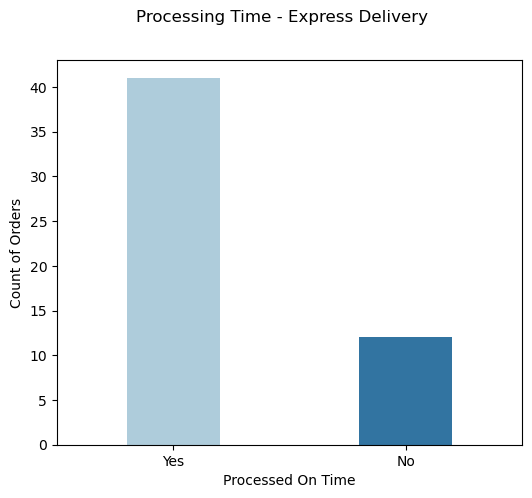

In [66]:
fig, ax = plt.subplots(1, figsize=(6,5))


ax=sns.countplot(x=df_processing_express['processed_on_time_y/n'], order=['yes', 'no'], palette='Paired', width=0.4)
fig.suptitle('Processing Time - Express Delivery')
ax.set_xlabel('Processed On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

# Pick-up time analysis #

Analysis of time lapse between the order is ready to ship till the order is actually picked up.

In [67]:
Standard_pickup_time = {0: 2, 1: 1, 2: 3, 3: 2, 4: 1, 5: 1, 6: 1}
Express_pickup_time = {0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1}

In [68]:
#df_merged.head()

In [69]:
df_merged_standard['ready_to_truck'] = df_merged_standard['on_truck_scan_date'] - df_merged_standard['ready_to_ship_date']
df_merged_express['ready_to_truck'] = df_merged_express['on_truck_scan_date'] - df_merged_express['ready_to_ship_date']

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3281566377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard['ready_to_truck'] = df_merged_standard['on_truck_scan_date'] - df_merged_standard['ready_to_ship_date']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3281566377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express['ready_to_truck'] = df_merged_express['on_truck_scan_date'] - df_merged_express['ready_to_ship_date']


In [70]:
df_merged_standard["expected_pickup_time"] =  df_merged_standard['order_weekday'].map(Standard_pickup_time)
df_merged_express["expected_pickup_time"] =  df_merged_express['order_weekday'].map(Express_pickup_time)


/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2604737101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard["expected_pickup_time"] =  df_merged_standard['order_weekday'].map(Standard_pickup_time)
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2604737101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express["expected_pickup_time"] =  df_merged_express['order_weekday'].map(Express_pickup_time)


In [71]:
df_merged_standard['pickuptime'] = df_merged_standard['ready_to_truck'].apply(lambda x: x.days)
df_merged_standard.drop(columns='ready_to_truck', inplace=True)
df_pickuptime_standard = df_merged_standard[df_merged_standard['pickuptime'] >= 0]
df_pickuptime_standard.head()

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3264648435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard['pickuptime'] = df_merged_standard['ready_to_truck'].apply(lambda x: x.days)
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3264648435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard.drop(columns='ready_to_truck', inplace=True)


,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_processing_time,expected_pickup_time,pickuptime
669,CA-2019-106278,2019-09-02,2019-09-06,Standard Processing,2019-09-05,2019-09-10,0,3.0,4,4.0,2,2,1.0
678,CA-2019-130407,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0
679,CA-2019-106950,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0
680,CA-2019-126732,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0
684,US-2019-147711,2019-09-03,2019-09-11,Standard Processing,2019-09-09,NaT,1,6.0,8,NaN,2,1,2.0


In [72]:
df_merged_express['pickuptime'] = df_merged_express['ready_to_truck'].apply(lambda x: x.days)
df_merged_express.drop(columns='ready_to_truck', inplace=True)
df_pickuptime_express = df_merged_express[df_merged_express['pickuptime'] >= 0]
df_pickuptime_express.head()

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2300462120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express['pickuptime'] = df_merged_express['ready_to_truck'].apply(lambda x: x.days)
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2300462120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express.drop(columns='ready_to_truck', inplace=True)


,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_processing_time,expected_pickup_time,pickuptime
641,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,NaT,0,0.0,1,NaN,2,0,1.0
648,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04,2019-09-10,0,2.0,2,6.0,2,0,0.0
649,CA-2019-129630,2019-09-04,2019-09-04,Express,2019-09-04,2019-09-09,2,0.0,0,5.0,2,0,0.0
663,CA-2019-158099,2019-09-03,2019-09-06,Express,2019-09-05,2019-09-11,1,2.0,3,5.0,2,1,1.0
664,CA-2019-132143,2019-09-03,2019-09-06,Express,2019-09-05,NaT,1,2.0,3,NaN,2,1,1.0


In [73]:
# df_merged_express["expected_order_truck_time"] =  df_merged_express['order_weekday'].map(Express_Realization_time )

In [74]:
df_pickuptime_standard['ready_to_pickup'] = df_pickuptime_standard['pickuptime'] - df_pickuptime_standard['expected_pickup_time']
df_pickuptime_standard['ready_to_pickup_y/n'] = df_pickuptime_standard['ready_to_pickup'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3000218530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pickuptime_standard['ready_to_pickup'] = df_pickuptime_standard['pickuptime'] - df_pickuptime_standard['expected_pickup_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/3000218530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pickuptime_standard['ready_to_pickup_y/n'] = df_pickuptime_standard['ready_to_pickup'].apply(lambda x: 'yes' if x <= 0 else '

In [75]:
df_pickuptime_express['ready_to_pickup'] = df_pickuptime_express['pickuptime'] - df_pickuptime_express['expected_pickup_time']
df_pickuptime_express['ready_to_pickup_y/n'] = df_pickuptime_express['ready_to_pickup'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/1671726458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pickuptime_express['ready_to_pickup'] = df_pickuptime_express['pickuptime'] - df_pickuptime_express['expected_pickup_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/1671726458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pickuptime_express['ready_to_pickup_y/n'] = df_pickuptime_express['ready_to_pickup'].apply(lambda x: 'yes' if x <= 0 else 'no')


In [76]:
# df_merged_express['shipped_on_time'] = df_merged_express['timetoship'] - df_merged_express['expected_order_truck_time']
# df_merged_express['shipped_on_time_y/n'] = df_merged_express['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

In [77]:
# df_std_gp_day = df_merged_standard.groupby('order_weekday').mean()['timetoship']

# df_std_gp_day

In [78]:
# fig, ax = plt.subplots(figsize=(10,5))
# (
#     df_merged_standard
#    .groupby('order_weekday') # aggregate data to level of airline
#    .mean()['timetoship'] # count the observations
#   .plot.bar() # Make a bar chart based on the dataframe
# )

# ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


# ax.bar()

In [79]:
# fig, ax = plt.subplots(figsize=(10,5))
# (
#     df_merged_express
#    .groupby('order_weekday') # aggregate data to level of airline
#    .mean()['timetoship'] # count the observations
#   .plot.bar() # Make a bar chart based on the dataframe
# )

# ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


# ax.bar()

In [80]:
# df_processing_express = df_merged_express[df_merged_express['ordertoready'] >= 0]
# df_processing_express.info()[df_processing_standard['processed_on_time_y/n']=='yes'].count()

In [81]:
# df_processing_standard[df_processing_standard['processed_on_time_y/n']=='yes'].count()

In [82]:
df_pickuptime_standard.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_processing_time,expected_pickup_time,pickuptime,ready_to_pickup,ready_to_pickup_y/n
669,CA-2019-106278,2019-09-02,2019-09-06,Standard Processing,2019-09-05,2019-09-10,0,3.0,4,4.0,2,2,1.0,-1.0,yes
678,CA-2019-130407,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0,1.0,no
679,CA-2019-106950,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0,1.0,no
680,CA-2019-126732,2019-09-02,2019-09-09,Standard Processing,2019-09-06,NaT,0,4.0,7,NaN,2,2,3.0,1.0,no
684,US-2019-147711,2019-09-03,2019-09-11,Standard Processing,2019-09-09,NaT,1,6.0,8,NaN,2,1,2.0,1.0,no


In [83]:
df_pickuptime_express['ready_to_pickup_y/n'].describe()

count      53
unique      2
top       yes
freq       44
Name: ready_to_pickup_y/n, dtype: object

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

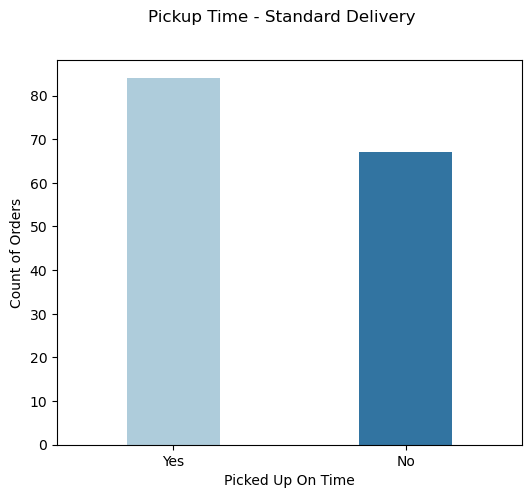

In [84]:
fig, ax = plt.subplots(1, figsize=(6,5))
df_pickuptime_standard
#fig.light_palette('seagreen')
ax=sns.countplot(x=df_pickuptime_standard['ready_to_pickup_y/n'], order=['yes', 'no'], palette='Paired', width=0.4)
fig.suptitle('Pickup Time - Standard Delivery')
ax.set_xlabel('Picked Up On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

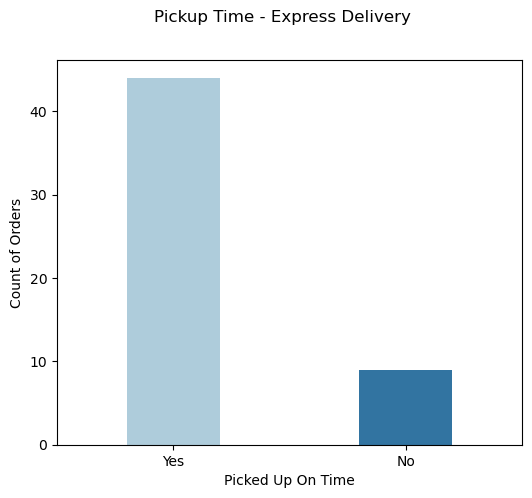

In [85]:
fig, ax = plt.subplots(1, figsize=(6,5))
df_pickuptime_standard
#fig.light_palette('seagreen')
ax=sns.countplot(x=df_pickuptime_express['ready_to_pickup_y/n'], order=['yes', 'no'], palette='Paired', width=0.4)
fig.suptitle('Pickup Time - Express Delivery')
ax.set_xlabel('Picked Up On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

# Order shipping Time analysis #

To analyze the time taken from the Order received till it is on the truck.

We are not using this in the presentation

In [86]:
# df_merged_standard['shipped_on_time'] = df_merged_standard['timetoship'] - df_merged_standard['expected_order_truck_time']
# df_merged_standard['shipped_on_time_y/n'] = df_merged_standard['shipped_on_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

In [87]:
# fig, ax = plt.subplots(1, figsize=(6,5))

# #fig.light_palette('seagreen')
# ax=sns.countplot(x=df_merged_standard['shipped_on_time_y/n'], order=['yes', 'no'], palette='Paired', width=0.4)
# fig.suptitle('Shipment Time - Standard Delivery')
# ax.set_xlabel('Shipped On Time')
# ax.set_ylabel('Count of Orders')
# ax.set_xticklabels(('Yes', 'No'))

In [88]:
# fig, ax = plt.subplots(figsize=(6,5))

# sns.countplot(x=df_merged_express['shipped_on_time_y/n'], palette='Paired', width=0.4)

# fig.suptitle('Shipment Time - Express Delivery')
# ax.set_xlabel('Shipped On Time')
# ax.set_ylabel('Count of Orders')
# ax.set_xticklabels(('Yes', 'No'))

In [89]:
# g = sns.catplot(x='ship_mode',hue='shipped_on_time_y/n', data=df_merge, kind='count')
# #g.set_xticklabels(])
# g.set_titles("Express Processing Orders Shipping")
# g.set_xlabels('Shipped On Time')
# g.set_ylabels('Count of orders')
# g.set_ylim(0,5000)

In [90]:
# fig, ax = plt.subplots(1, 2, figsize=(10,5))
# fig.suptitle('Shipment On Time - Standard Delivery')

# ax[0]=sns.countplot(x=df_merged_standard['shipped_on_time_y/n'], order=['yes', 'no'], color='blue', palette='Set2', width=0.5);
# ax[0].set_xlabel('Shipped On Time')
# ax[0].set_ylabel('Count of Orders')
# ax[0].set_xticklabels(('Yes', 'No'))

# ax[1]=sns.countplot(x=df_merged_express['shipped_on_time_y/n'], color='blue', palette='Set2', width=0.5);
# ax[1].set_xlabel('Shipped On Time')
# ax[1].set_ylabel('Count of Orders')
# ax[1].set_xticklabels(('Yes', 'No'))

In [91]:
# g = sns.catplot(x='order_weekday',hue='shipped_on_time_y/n', data=df_merged_standard, kind='count')
# g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
# g.set_titles("Standard Processing Orders Shipping")
# g.set_xlabels('Order Day')
# g.set_ylabels('Count of orders')

In [92]:
# g = sns.catplot(x='order_weekday',hue='shipped_on_time_y/n', data=df_merged_express, kind='count')
# g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
# g.set_titles("Express Processing Orders Shipping")
# g.set_xlabels('Order Day')
# g.set_ylabels('Count of orders')

# On Transit Graphs #

The time taken from the order picked up by the logistics to the time it is delivered to the customer.

In [93]:
Standard_transit_time = {0: 3, 1: 3, 2: 4, 3: 5, 4: 5, 5: 5, 6: 5}
Express_transit_time = {0: 5, 1: 3, 2: 3, 3: 3, 4: 5, 5: 5, 6: 5}

In [94]:
df_merged_standard["expected_transit_time"] =  df_merged_standard['order_weekday'].map(Standard_processing_Time)
df_merged_express["expected_transit_time"] =  df_merged_express['order_weekday'].map(Express_processing_time)

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2132864394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_standard["expected_transit_time"] =  df_merged_standard['order_weekday'].map(Standard_processing_Time)
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2132864394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_express["expected_transit_time"] =  df_merged_express['order_weekday'].map(Express_processing_time)


In [95]:
df_transit_standard = df_merged_standard[df_merged_standard['transittime'] >= 0]
df_transit_standard.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_processing_time,expected_pickup_time,pickuptime,expected_transit_time
248,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,NaT,2019-05-03,4,NaN,10,4.0,4,1,NaN,4
249,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,2019-05-06,0,NaN,7,7.0,2,2,NaN,2
250,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,NaT,2019-05-06,2,NaN,7,5.0,2,3,NaN,2
251,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,NaT,2019-05-07,3,NaN,6,6.0,4,2,NaN,4
253,CA-2019-109869,2019-04-22,2019-05-01,Standard Processing,NaT,2019-05-07,0,NaN,9,6.0,2,2,NaN,2


In [96]:
df_transit_express = df_merged_express[df_merged_express['transittime'] >= 0]
df_transit_express.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,expected_processing_time,expected_pickup_time,pickuptime,expected_transit_time
246,CA-2019-138933,2019-04-24,2019-04-29,Express,NaT,2019-05-03,2,NaN,5,4.0,2,0,NaN,2
260,CA-2019-161816,2019-04-28,2019-05-03,Express,NaT,2019-05-07,6,NaN,5,4.0,2,1,NaN,2
261,CA-2019-146836,2019-05-02,2019-05-03,Express,NaT,2019-05-06,3,NaN,1,3.0,4,0,NaN,4
265,CA-2019-129280,2019-05-03,2019-05-06,Express,NaT,2019-05-13,4,NaN,3,7.0,4,1,NaN,4
267,CA-2019-145247,2019-05-05,2019-05-08,Express,NaT,2019-05-10,6,NaN,3,2.0,2,1,NaN,2


In [97]:
df_transit_standard['transit_time'] = df_transit_standard['transittime'] - df_transit_standard['expected_transit_time']
df_transit_standard['transition_on_time_y/n'] = df_transit_standard['transit_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/141910295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transit_standard['transit_time'] = df_transit_standard['transittime'] - df_transit_standard['expected_transit_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/141910295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transit_standard['transition_on_time_y/n'] = df_transit_standard['transit_time'].apply(lambda x: 'yes' if x <= 0 else 'no')


In [98]:
df_transit_express['transit_time'] = df_transit_express['transittime'] - df_transit_express['expected_transit_time']
df_transit_express['transition_on_time_y/n'] = df_transit_express['transit_time'].apply(lambda x: 'yes' if x <= 0 else 'no')

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/1503700279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transit_express['transit_time'] = df_transit_express['transittime'] - df_transit_express['expected_transit_time']
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/1503700279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transit_express['transition_on_time_y/n'] = df_transit_express['transit_time'].apply(lambda x: 'yes' if x <= 0 else 'no')


In [99]:
df_transit_express['transition_on_time_y/n'].describe()

count     75
unique     2
top       no
freq      61
Name: transition_on_time_y/n, dtype: object

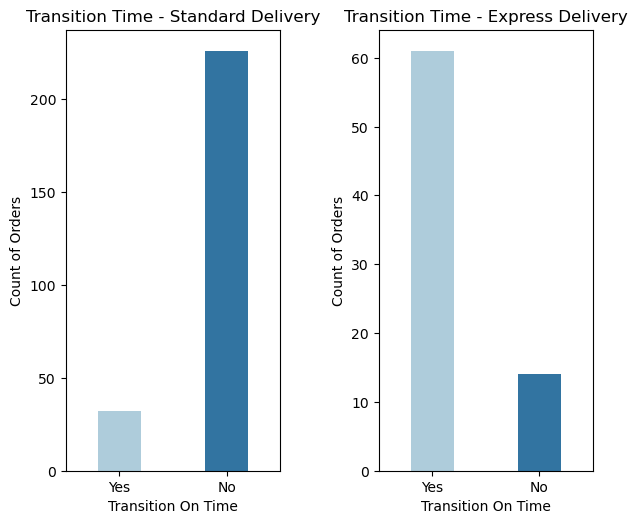

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,5))
fig.tight_layout(w_pad = 4)

sns.countplot(x=df_transit_standard['transition_on_time_y/n'], palette='Paired', width=0.4, ax=ax1)
ax1.set_title('Transition Time - Standard Delivery')
ax1.set_xlabel('Transition On Time')
ax1.set_ylabel('Count of Orders')
ax1.set_xticklabels(('Yes', 'No'))
ax1.grid=True

sns.countplot(x=df_transit_express['transition_on_time_y/n'], palette='Paired', width=0.4, ax=ax2)
ax2.set_title('Transition Time - Express Delivery')
ax2.set_xlabel('Transition On Time')
ax2.set_ylabel('Count of Orders')
ax2.set_xticklabels(('Yes', 'No'))
ax2.grid = True

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

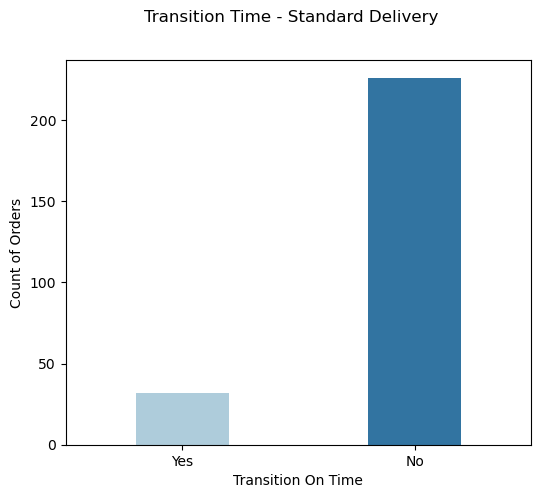

In [101]:
fig, ax = plt.subplots(figsize=(6,5))

sns.countplot(x=df_transit_standard['transition_on_time_y/n'], palette='Paired', width=0.4)

fig.suptitle('Transition Time - Standard Delivery')
ax.set_xlabel('Transition On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

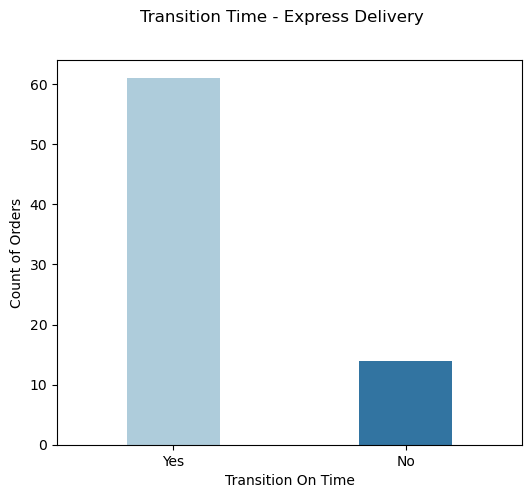

In [102]:
fig, ax = plt.subplots(figsize=(6,5))

sns.countplot(x=df_transit_express['transition_on_time_y/n'], palette='Paired', width=0.4)

fig.suptitle('Transition Time - Express Delivery')
ax.set_xlabel('Transition On Time')
ax.set_ylabel('Count of Orders')
ax.set_xticklabels(('Yes', 'No'))

# Mean Order Realization Time #

To find the mean days for the complete order flow from order placement to order received by the customer. The relation is based on the day which day of the week is order received.

In [103]:
df_sample = order_arrival.copy()

In [104]:
df_sample.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaN
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN


In [105]:
df_sample['order_reaching_days'] = df_sample['arrival_scan_date'] - df_sample['order_date']

In [106]:
df_sample.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,order_reaching_days
0,CA-2019-125206,2019-01-03,2019-01-07,Express,NaT,NaT,3,NaN,4,NaN,NaT
1,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,NaT,NaT,2,NaN,7,NaN,NaT
2,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN,NaT
3,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,NaT,NaT,3,NaN,6,NaN,NaT
4,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,NaT,NaT,4,NaN,5,NaN,NaT


In [107]:
df_sample['order_realization_days'] = df_sample['order_reaching_days'].apply(lambda x: x.days)
df_sample.drop(columns='order_reaching_days', inplace=True)
df_sample_active = df_sample[df_sample['order_realization_days'] >= 0]
df_sample_active.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,order_realization_days
246,CA-2019-138933,2019-04-24,2019-04-29,Express,NaT,2019-05-03,2,NaN,5,4.0,9.0
248,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,NaT,2019-05-03,4,NaN,10,4.0,14.0
249,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,2019-05-06,0,NaN,7,7.0,14.0
250,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,NaT,2019-05-06,2,NaN,7,5.0,12.0
251,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,NaT,2019-05-07,3,NaN,6,6.0,12.0


In [108]:
df_sample_active['order_realization_days'].describe()

count    333.000000
mean      10.834835
std        2.862257
min        3.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       17.000000
Name: order_realization_days, dtype: float64

In [109]:
df_sample_standard = df_sample_active[df_sample_active['ship_mode'] == 'Standard Processing']
df_sample_standard.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,order_realization_days
248,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,NaT,2019-05-03,4,NaN,10,4.0,14.0
249,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,2019-05-06,0,NaN,7,7.0,14.0
250,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,NaT,2019-05-06,2,NaN,7,5.0,12.0
251,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,NaT,2019-05-07,3,NaN,6,6.0,12.0
253,CA-2019-109869,2019-04-22,2019-05-01,Standard Processing,NaT,2019-05-07,0,NaN,9,6.0,15.0


In [110]:
df_sample_standard.quantile(0.95)['order_realization_days']

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2654460794.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sample_standard.quantile(0.95)['order_realization_days']


15.0

/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2669349721.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample_standard
/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2669349721.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample_standard.groupby('order_weekday')


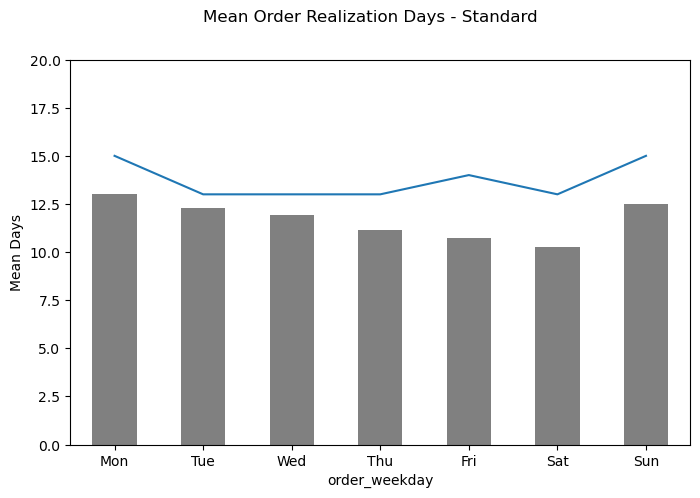

In [111]:
fig, ax = plt.subplots(figsize=(8,5))
ax=(
    df_sample_standard
   .groupby('order_weekday') # aggregate data to level of airline
   .mean()['order_realization_days'] # count the observations
  .plot.bar(color='grey',) # Make a bar chart based on the dataframe
)
fig.suptitle('Mean Order Realization Days - Standard')
ax.set_ylim(0,20)
ax.set(xlabel='Order Day', ylabel='Mean Days')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax=(
    df_sample_standard.groupby('order_weekday')
    .quantile(0.95)['order_realization_days']
    .plot.line()
)


In [112]:
df_sample_standard.head(5)

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,order_realization_days
248,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,NaT,2019-05-03,4,NaN,10,4.0,14.0
249,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,NaT,2019-05-06,0,NaN,7,7.0,14.0
250,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,NaT,2019-05-06,2,NaN,7,5.0,12.0
251,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,NaT,2019-05-07,3,NaN,6,6.0,12.0
253,CA-2019-109869,2019-04-22,2019-05-01,Standard Processing,NaT,2019-05-07,0,NaN,9,6.0,15.0


<AxesSubplot: xlabel='order_weekday', ylabel='order_id'>

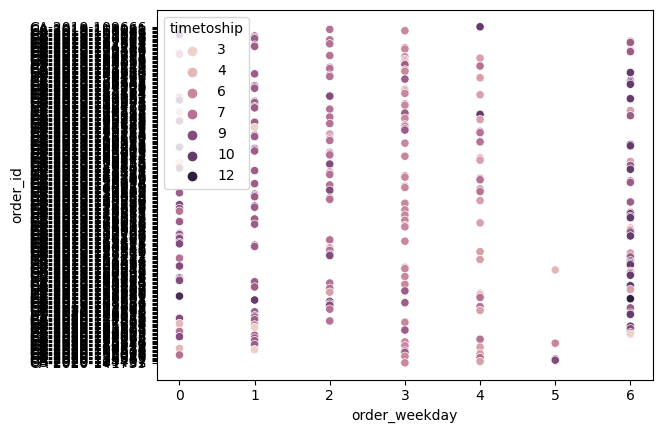

In [113]:
#df_view = df_sample_standard.groupby('order_weekday').mean()['order_realization_days'].reset_index()
sns.scatterplot(data=df_sample_standard, x='order_weekday', y='order_id', hue='timetoship')
#df_view

In [114]:
df_sample_express = df_sample_active[df_sample_active['ship_mode'] == 'Express']
df_sample_express.head()

,order_id,order_date,on_truck_scan_date,ship_mode,ready_to_ship_date,arrival_scan_date,order_weekday,ordertoready,timetoship,transittime,order_realization_days
246,CA-2019-138933,2019-04-24,2019-04-29,Express,NaT,2019-05-03,2,NaN,5,4.0,9.0
260,CA-2019-161816,2019-04-28,2019-05-03,Express,NaT,2019-05-07,6,NaN,5,4.0,9.0
261,CA-2019-146836,2019-05-02,2019-05-03,Express,NaT,2019-05-06,3,NaN,1,3.0,4.0
265,CA-2019-129280,2019-05-03,2019-05-06,Express,NaT,2019-05-13,4,NaN,3,7.0,10.0
267,CA-2019-145247,2019-05-05,2019-05-08,Express,NaT,2019-05-10,6,NaN,3,2.0,5.0


/var/folders/zb/5pjlmnyj1wdg0qvcvbw6ysv80000gn/T/ipykernel_3028/2906608688.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample_express


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

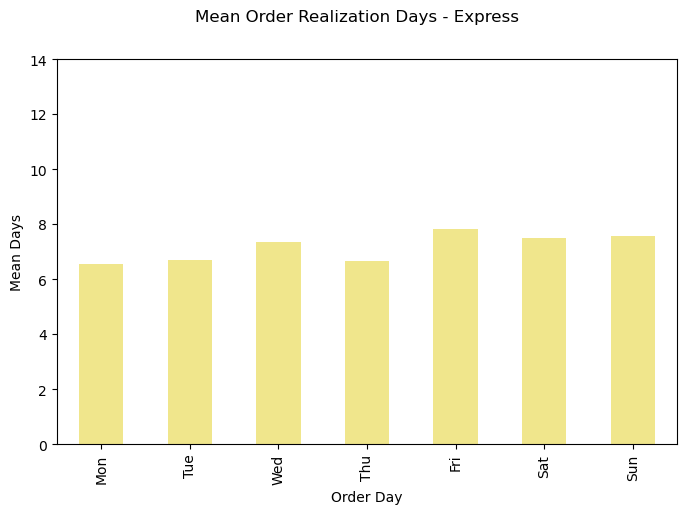

In [115]:
fig, ax = plt.subplots(figsize=(8,5))
(
    df_sample_express
   .groupby('order_weekday') # aggregate data to level of airline
   .mean()['order_realization_days'] # count the observations
  .plot.bar(color='khaki') # Make a bar chart based on the dataframe
)
ax.set_ylim(0,14)
fig.suptitle('Mean Order Realization Days - Express')
ax.set(xlabel='Order Day', ylabel='Mean Days')
ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


ax.bar()

In [ ]:
pv_table_cancelled = pd.pivot_table(final_table_df[final_table_df['cancelled']==1], index='flight_date', values=('tail_number'), aggfunc={'tail_number':'count'}).copy()
pv_table_delayed = pd.pivot_table(final_table_df[final_table_df['cancelled']!=1], index='flight_date', values=('tail_number'), aggfunc={'tail_number':'count'}).copy()
fig, ax = plt.subplots(5,1, figsize=(10,8))
fig.tight_layout(h_pad = 4)
sns.lineplot(data=final_table_df, x='flight_date', y='prcp', ax=ax[0])
sns.lineplot(data=final_table_df, x='flight_date', y='wspd', ax=ax[1])
sns.lineplot(data=final_table_df, x='flight_date', y='pres', ax=ax[2])
sns.lineplot(data=pv_table_cancelled, x='flight_date', y='tail_number', ax=ax[3])
sns.lineplot(data=pv_table_delayed, x='flight_date', y='tail_number', ax=ax[4])